In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append("../src/")

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from motion_detection import MogDetector

In [5]:
def draw_img(img: np.ndarray, figsize: tuple = (16, 9), cmap: str = None):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.show()

In [6]:
def write_video(frames, name, is_colored=True):
    height, width = frames[0].shape[:2]
    video_writer = cv2.VideoWriter(
        f"{name}.mp4",
        cv2.VideoWriter_fourcc(*"mp4v"),
        30,
        (width, height),
        isColor=is_colored
    )
    
    for frame in frames:
        video_writer.write(cv2.convertScaleAbs(frame))

    video_writer.release()

In [23]:
def convert_to_grayscale(img: np.ndarray, ksize: tuple = (3, 3)) -> np.ndarray:
    # assuming that if shape is equal to 2 than it's already a grayscale image
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.GaussianBlur(img, ksize=ksize, sigmaX=0)

    return img

# Basic (simple) task

In [7]:
background_rect = cv2.imread("../data/pictures/blue_rectangle.jpg")[..., ::-1]
foreground_rect = cv2.imread("../data/pictures/purple_rectangle.png")[..., ::-1]

In [8]:
foreground_rect = foreground_rect[30:210, 30:220]

In [9]:
background_rect.shape, foreground_rect.shape

((468, 720, 3), (180, 190, 3))

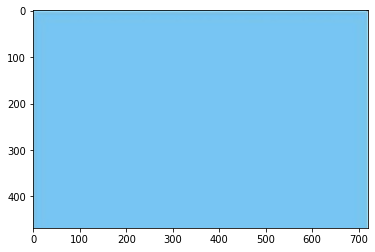

In [10]:
plt.imshow(background_rect)

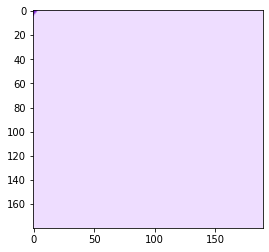

In [11]:
plt.imshow(foreground_rect)

In [12]:
foreground_rect = cv2.resize(foreground_rect, (64, 64))

In [184]:
generated_frames = [background_rect]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground_rect.shape[1], foreground_rect.shape[0]
    generated_frame = background_rect.copy()
    generated_frame[y:y+height, x:x+width] = foreground_rect
    generated_frames.append(generated_frame)

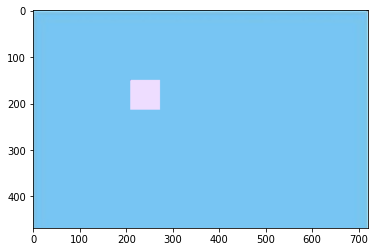

In [185]:
plt.imshow(generated_frames[200])

---

In [15]:
detector = MogDetector()

In [16]:
detections = []
frame_diffs = []
detector_backgrounds = []
for frame in generated_frames:
    frame_diffs.append(detector.get_frame_difference(frame))
    detections.append(detector.detect(frame, area_threshold=10))
    detector_backgrounds.append(detector.background_substractor.getBackgroundImage())

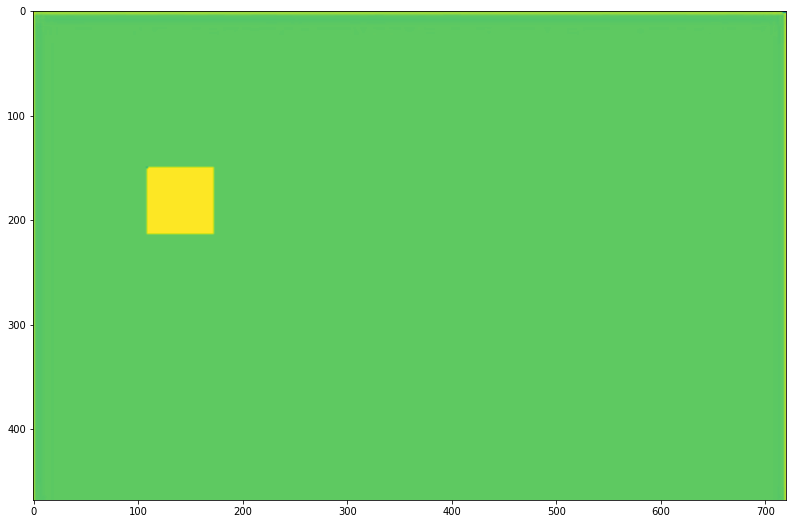

In [17]:
draw_img(detector_backgrounds[100])

In [18]:
write_video(detector_backgrounds, "mog-detector-background1", is_colored=False)

In [19]:
write_video(frame_diffs, "mog-detector-diffs1", is_colored=False)

In [20]:
detections_video = []
for i in range(len(detections)):
    frame_annot = generated_frames[i].copy()
    for bbox in detections[i]:
        x, y, width, height = bbox
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    detections_video.append(frame_annot)

In [21]:
write_video(detections_video, "mog-detector-detections1", is_colored=True)

---

In [22]:
detector.background_substractor

<BackgroundSubtractorMOG2 0x7fb52dff1db0>

---

# Car bottom background and rectangular bomb

In [24]:
background = cv2.imread("../../data/car_bottom/car_bottom2.png")[..., ::-1]
foreground = cv2.imread("../../data/bombs/c4_csgo.webp")[..., ::-1]

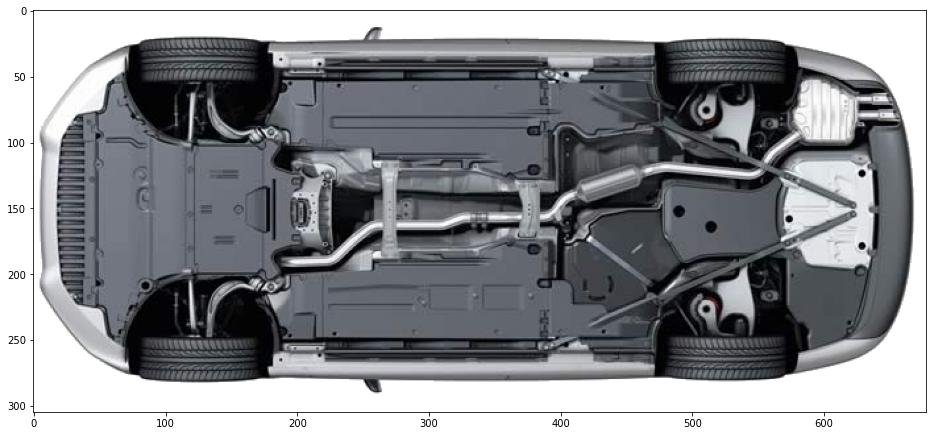

In [25]:
draw_img(background)

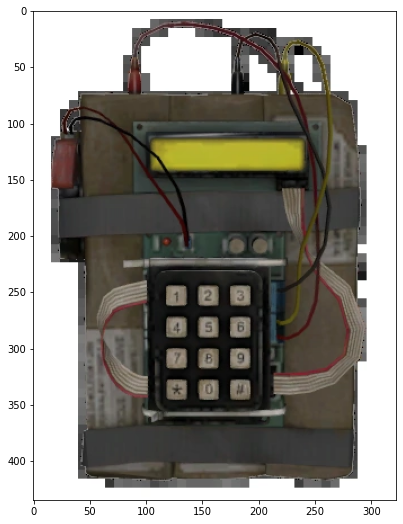

In [26]:
draw_img(foreground)

In [27]:
foreground = cv2.resize(foreground, (64, 64))

In [28]:
generated_frames = [background]
for i in range(300):
    x, y, width, height = 10 + i, 150, foreground.shape[1], foreground.shape[0]
    generated_frame = background.copy()
    generated_frame[y:y+height, x:x+width] = foreground
    generated_frames.append(generated_frame)

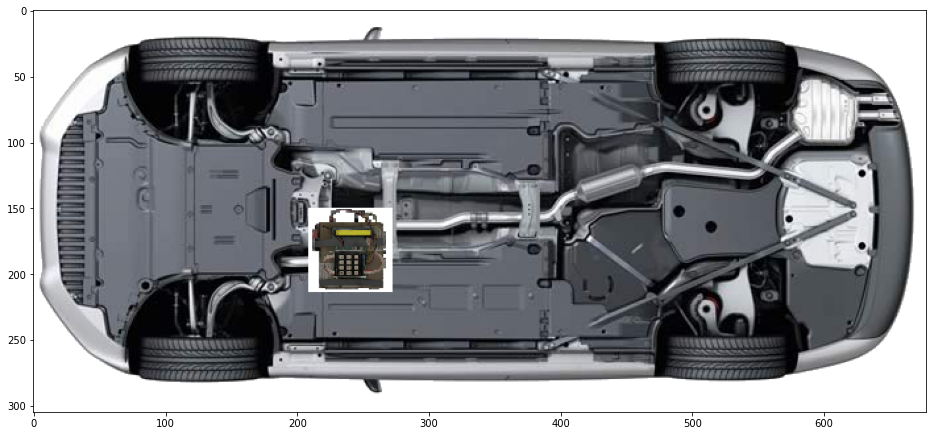

In [29]:
draw_img(generated_frames[200])

In [30]:
detector = MogDetector()

In [31]:
detections = []
frame_diffs = []
detector_backgrounds = []
for frame in generated_frames:
    frame_diffs.append(detector.get_frame_difference(frame))
    detections.append(detector.detect(frame, area_threshold=10))
    detector_backgrounds.append(detector.background_substractor.getBackgroundImage())

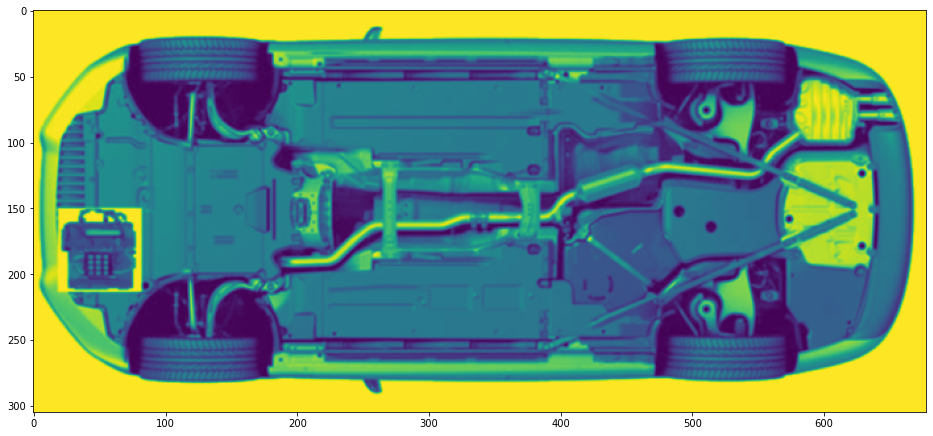

In [32]:
draw_img(detector_backgrounds[10])

In [33]:
write_video(detector_backgrounds, "mog-detector-background2", is_colored=False)

In [34]:
write_video(frame_diffs, "mog-detector-diffs2", is_colored=False)

In [35]:
detections_video = []
for i in range(len(detections)):
    frame_annot = generated_frames[i].copy()
    for bbox in detections[i]:
        x, y, width, height = bbox
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    detections_video.append(frame_annot)

In [36]:
write_video(detections_video, "mog-detector-detections2", is_colored=True)

---

# Car bottom background and masked (non-rectangular) bomb

In [37]:
foreground_img = Image.fromarray(foreground)
foreground_mask = Image.fromarray((foreground < 255).astype(np.uint8) * 255).convert("L")

In [157]:
generated_frames = [background]
for i in range(300):
    x, y, width, height = 10 + i*3, 150, foreground.shape[1], foreground.shape[0]
    generated_frame = Image.fromarray(background)
    generated_frame.paste(foreground_img, (x, y), mask=foreground_mask)
    generated_frames.append(np.asarray(generated_frame, np.uint8))

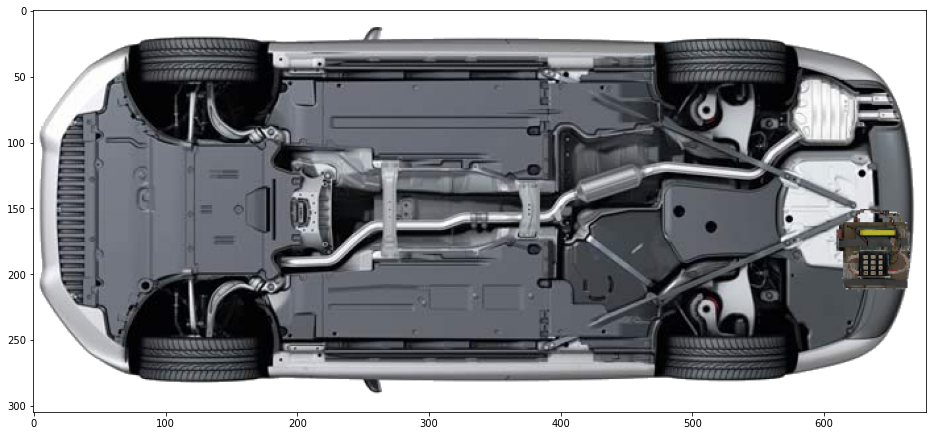

In [57]:
draw_img(generated_frames[200])

In [65]:
detector = MogDetector()

In [66]:
detections = []
frame_diffs = []
detector_backgrounds = []
for frame in generated_frames:
    frame_diffs.append(detector.get_frame_difference(frame))
    detections.append(detector.detect(frame, area_threshold=50))
    detector_backgrounds.append(detector.background_substractor.getBackgroundImage())

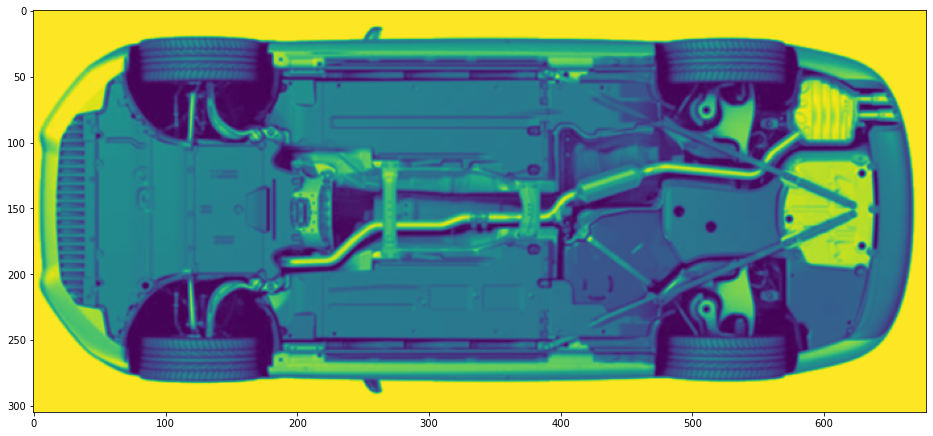

In [67]:
draw_img(detector_backgrounds[0])

In [68]:
write_video(detector_backgrounds, "mog-detector-background3", is_colored=False)

In [69]:
write_video(frame_diffs, "mog-detector-diffs3", is_colored=False)

In [70]:
detections_video = []
for i in range(len(detections)):
    frame_annot = generated_frames[i].copy()
    for bbox in detections[i]:
        x, y, width, height = bbox
        cv2.rectangle(frame_annot, (x, y), (x+width, y+height), color=(255, 0, 0), thickness=2)
        
    detections_video.append(frame_annot)

In [71]:
write_video(detections_video, "mog-detector-detections3", is_colored=True)

---

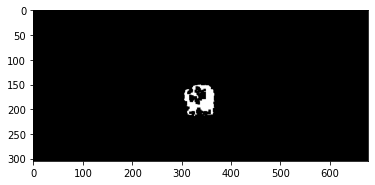

In [76]:
plt.imshow(frame_diffs[100], cmap="gray")

In [78]:
contours, _ = cv2.findContours(frame_diffs[100], mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [79]:
contours

(array([[[346, 212]]], dtype=int32),
 array([[[342, 209]],
 
        [[343, 209]]], dtype=int32),
 array([[[338, 150]],
 
        [[337, 151]],
 
        [[333, 151]],
 
        [[332, 152]],
 
        [[327, 152]],
 
        [[326, 153]],
 
        [[324, 153]],
 
        [[324, 155]],
 
        [[323, 156]],
 
        [[322, 156]],
 
        [[322, 158]],
 
        [[324, 160]],
 
        [[324, 164]],
 
        [[323, 165]],
 
        [[323, 166]],
 
        [[322, 167]],
 
        [[320, 167]],
 
        [[319, 168]],
 
        [[319, 169]],
 
        [[318, 170]],
 
        [[312, 170]],
 
        [[311, 169]],
 
        [[311, 165]],
 
        [[312, 164]],
 
        [[312, 163]],
 
        [[313, 162]],
 
        [[314, 162]],
 
        [[315, 161]],
 
        [[315, 160]],
 
        [[311, 160]],
 
        [[310, 161]],
 
        [[309, 161]],
 
        [[308, 162]],
 
        [[308, 165]],
 
        [[307, 166]],
 
        [[307, 167]],
 
        [[306, 168]],
 
        [[306,

In [80]:
for contour in contours:
    print(cv2.contourArea(contour))

0.0
0.0
2508.0


In [84]:
cv2.drawContours(frame_diffs[100].copy(), contours, 2, (255, 0, 0))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

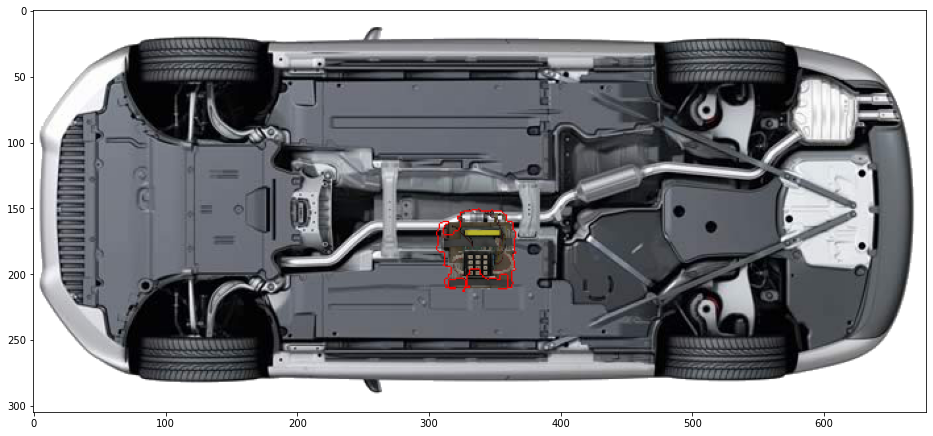

In [89]:
plt.figure(figsize=(16, 9))
plt.imshow(cv2.drawContours(generated_frames[100].copy(), contours, 2, (255, 0, 0)))
plt.show()

In [92]:
bbox = cv2.boundingRect(contours[2])

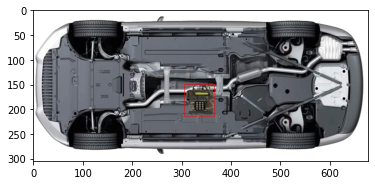

In [93]:
tmp = generated_frames[100]
x, y, width, height = bbox
cv2.rectangle(tmp, (x, y), (x+width, y+height), (255, 0, 0))
plt.imshow(tmp)

---

In [186]:
tmp_back = convert_to_grayscale(background_rect)
tmp_img = convert_to_grayscale(generated_frames[100])

In [187]:
tmp_diff = cv2.absdiff(tmp_back, tmp_img)
tmp_diff = cv2.morphologyEx(
    tmp_diff, cv2.MORPH_CLOSE, np.ones((5, 5), dtype=np.uint8)
)

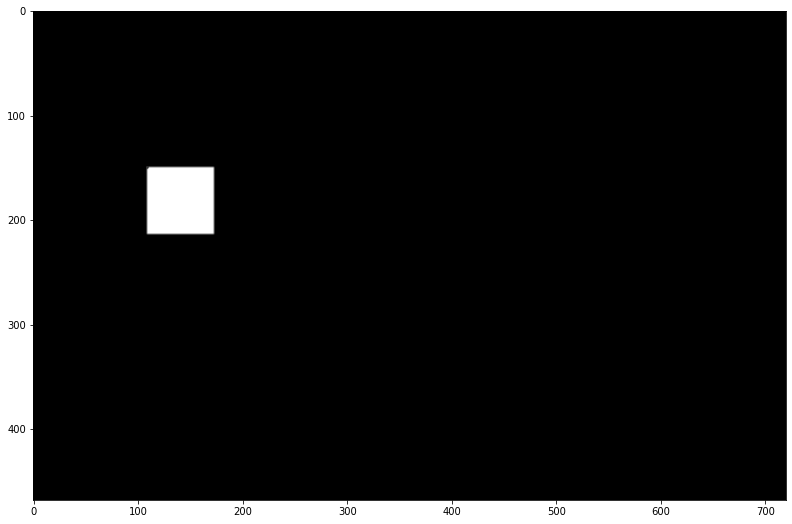

In [188]:
draw_img(tmp_diff, cmap="gray")

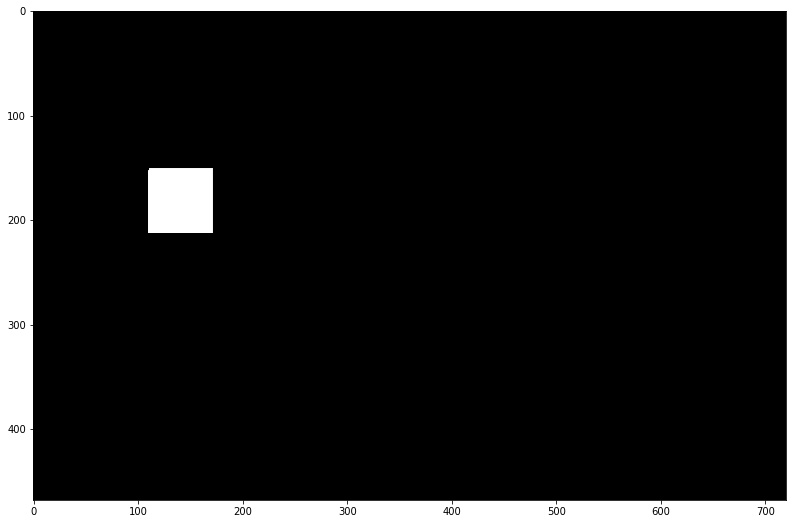

In [189]:
draw_img(
    cv2.threshold(
        tmp_diff, thresh=50, maxval=255, type=cv2.THRESH_BINARY
    )[1],
    cmap="gray"
)

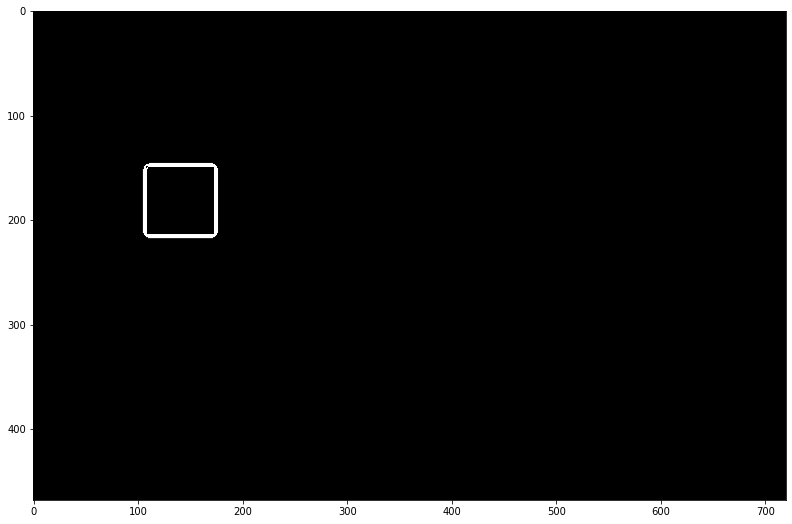

In [197]:
draw_img(
    cv2.adaptiveThreshold(
        tmp_diff, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    ),
    cmap="gray"
)

In [198]:
tmp_diff_thresh = cv2.adaptiveThreshold(
    tmp_diff, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

In [199]:
contours, _ = cv2.findContours(tmp_diff_thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [200]:
contours

(array([[[111, 146]],
 
        [[110, 147]],
 
        [[108, 147]],
 
        [[106, 149]],
 
        [[106, 151]],
 
        [[105, 152]],
 
        [[105, 212]],
 
        [[106, 213]],
 
        [[106, 214]],
 
        [[108, 216]],
 
        [[109, 216]],
 
        [[110, 217]],
 
        [[171, 217]],
 
        [[172, 216]],
 
        [[173, 216]],
 
        [[175, 214]],
 
        [[175, 213]],
 
        [[176, 212]],
 
        [[176, 151]],
 
        [[175, 150]],
 
        [[175, 149]],
 
        [[173, 147]],
 
        [[172, 147]],
 
        [[171, 146]]], dtype=int32),)

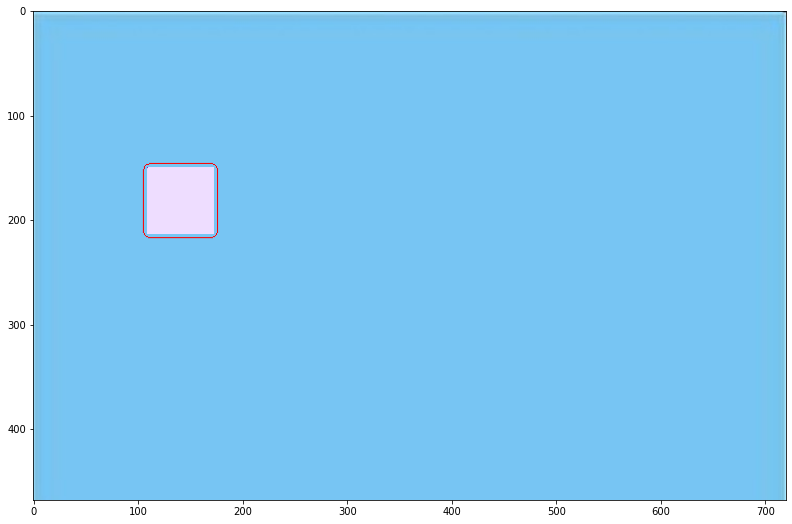

In [201]:
draw_img(cv2.drawContours(generated_frames[100].copy(), contours, -1, (255, 0, 0)))